# Sport Analysis

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
fifa=pd.read_csv(r"D:\FSDS\april(2025)\2nd- Seaborn, Eda Practicle\2nd- Seaborn, Eda Practicle\Seaborn - SPORT\FIFA.csv")
fifa

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [12]:
fifa.shape

(18207, 89)

In [14]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [18]:
fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [20]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [22]:
fifa.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [24]:
len(fifa)

18207

In [26]:
fifa.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [29]:
fifa.tail()

Unnamed: 0      ID                Name  Age  \
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
18202   Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
18203    Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
18204  Cambridge United  ...      41.0    32.0           13.0           11.0   
18205   Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
18206   Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

      GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
18202     10.0        13.0        7.0            8.0        9.0          €143K  
18203     10.0         9.0        9.0            5.0       12.0          €113K  
18204      6.0         5.0       10.0            6.0       13.0          €165K  
18205     14.0         6.0       14.0            8.0        9.0          €143K  
18206     10.0        15.0        9.0           12.0        9.0          €165K  

[5 rows x 89 columns]

In [31]:
fifa['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

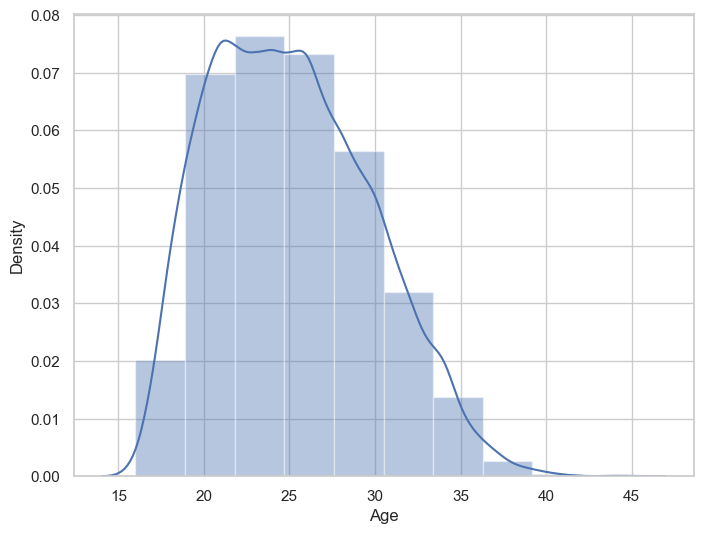

In [39]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
ax=sns.distplot(x,bins=10)
plt.show()

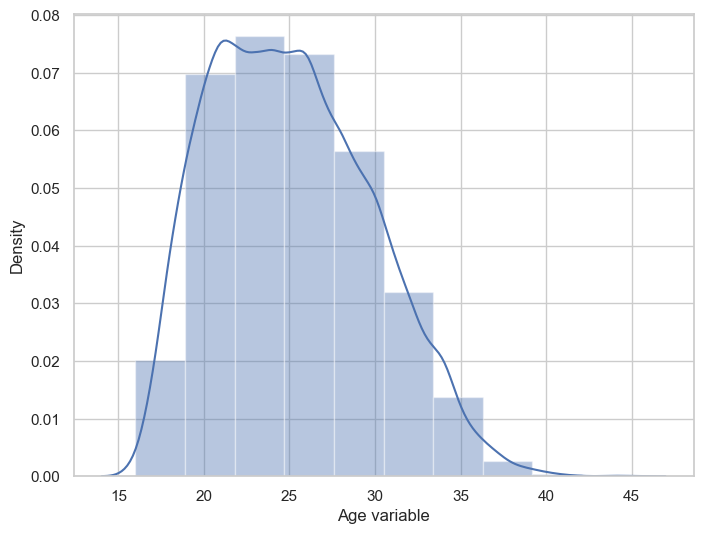

In [45]:
f,ax=plt.subplots(figsize=(8,6))
x-fifa['Age']
x=pd.Series(x,name="Age variable")
ax=sns.distplot(x,bins=10)
plt.show()

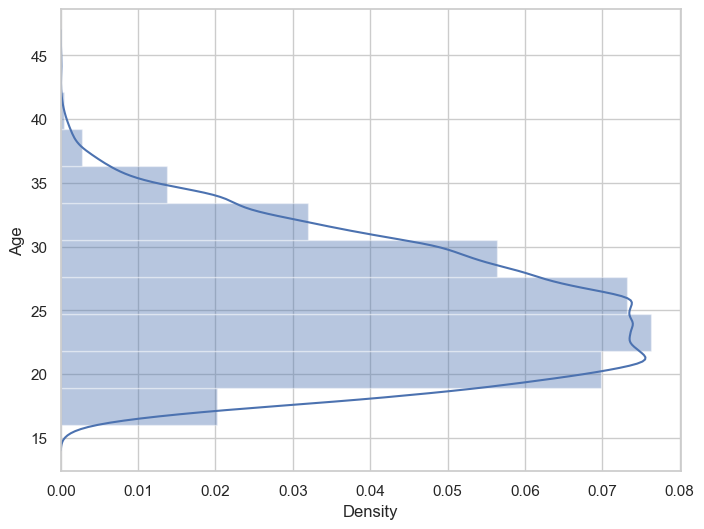

In [51]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

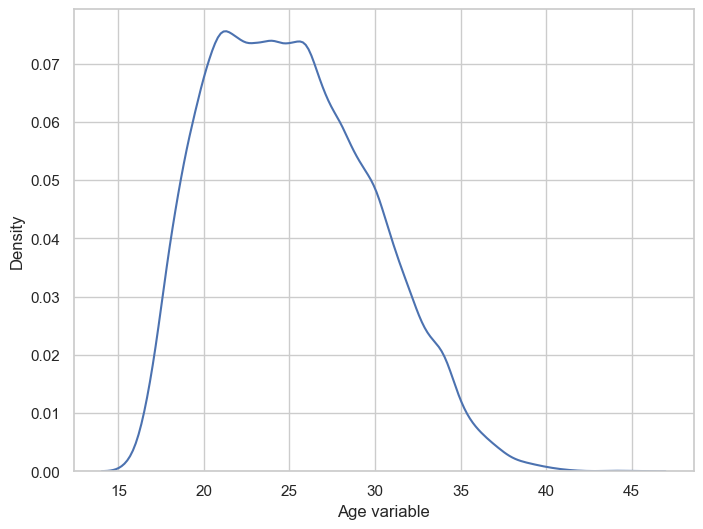

In [53]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

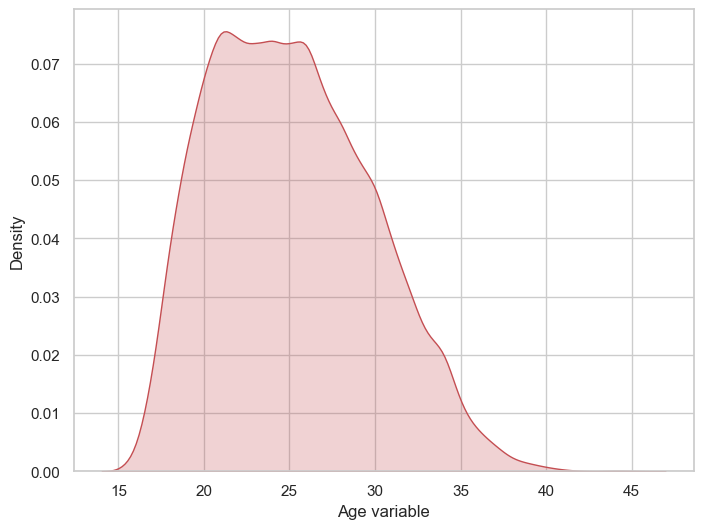

In [57]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

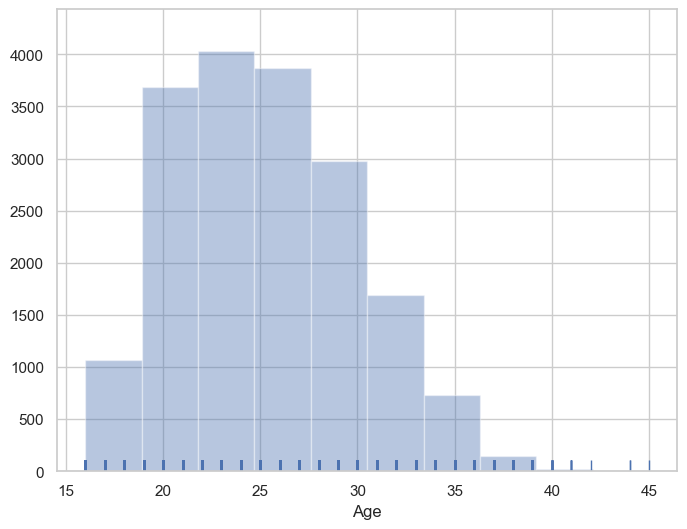

In [59]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

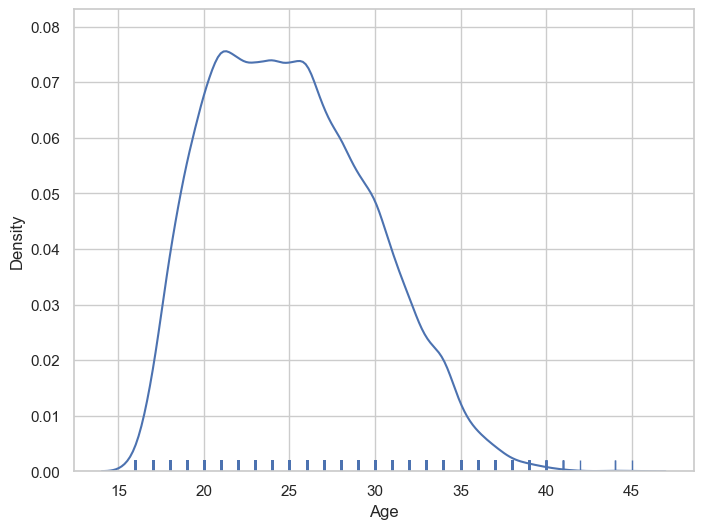

In [63]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
ax=sns.distplot(x,hist=False,rug=True,bins=10)
plt.show()

In [65]:
fifa['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [67]:
fifa["Preferred Foot"].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

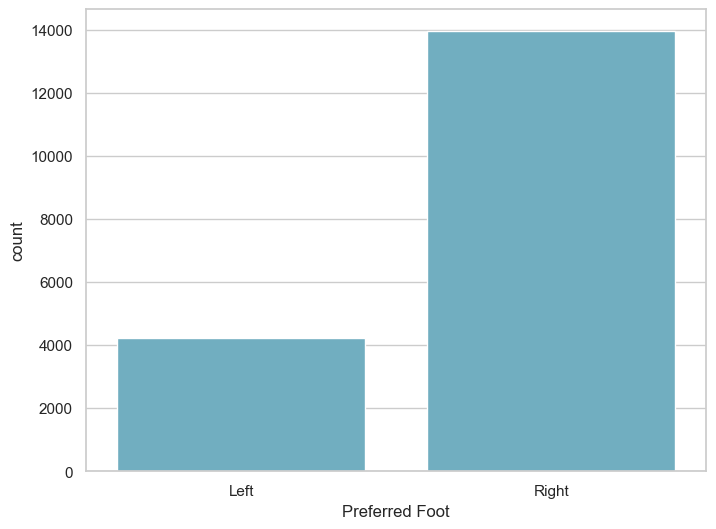

In [69]:
f,ax=plt.subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot",data=fifa,color="c")
plt.show()

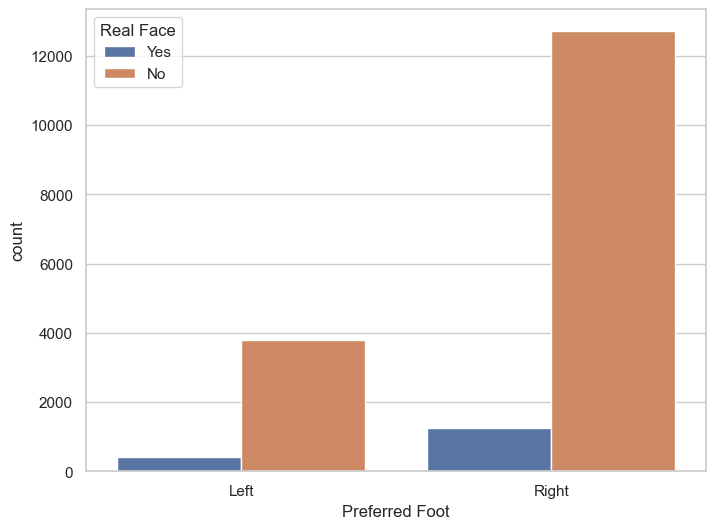

In [77]:
f,ax=plt.subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot", hue="Real Face",data=fifa)
plt.show()

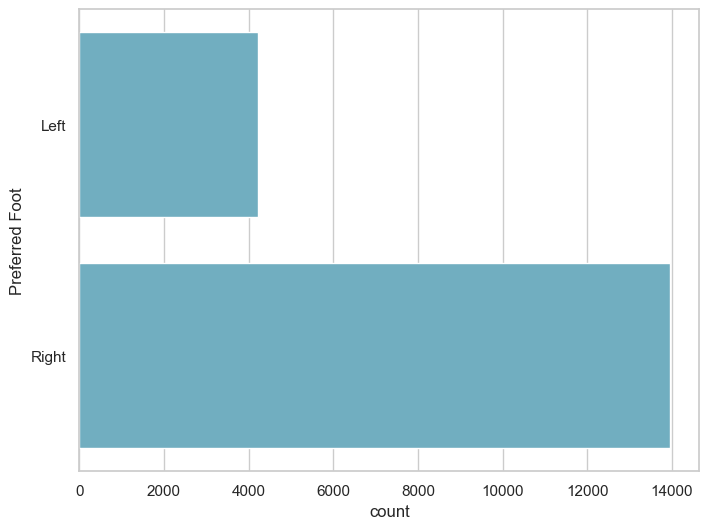

In [79]:
f,ax=plt.subplots(figsize=(8,6))
sns.countplot(y="Preferred Foot",data=fifa,color="c")
plt.show()

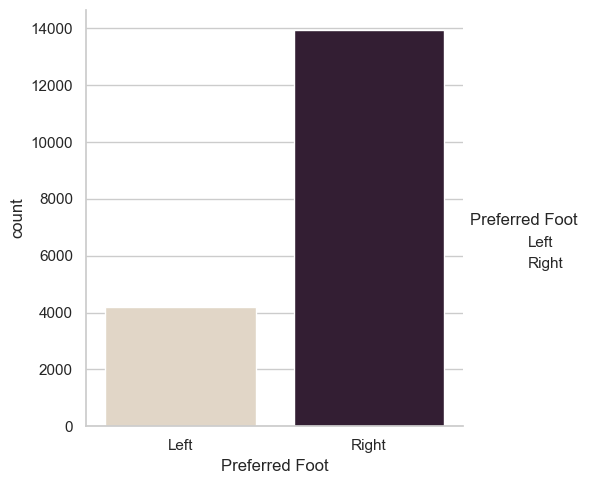

In [93]:
sns.catplot(x="Preferred Foot",kind="count",palette="ch:.25",data=fifa)
plt.show()

In [95]:
fifa['International Reputation'].nunique()

5

In [97]:
fifa['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

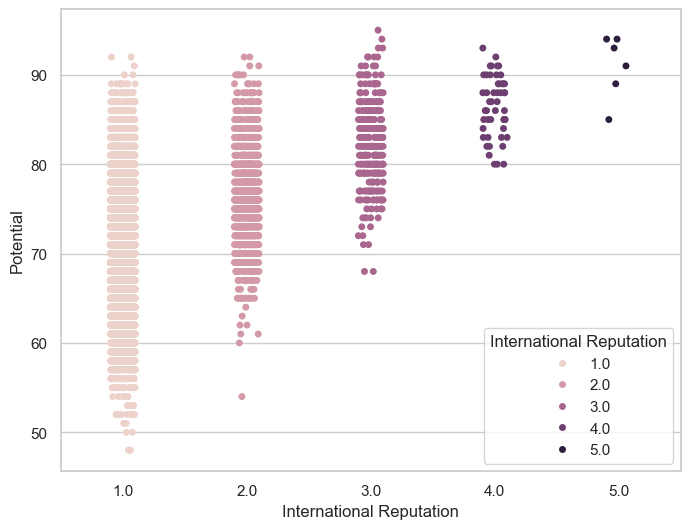

In [115]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x="International Reputation",y="Potential",data=fifa,hue="International Reputation")
plt.show()

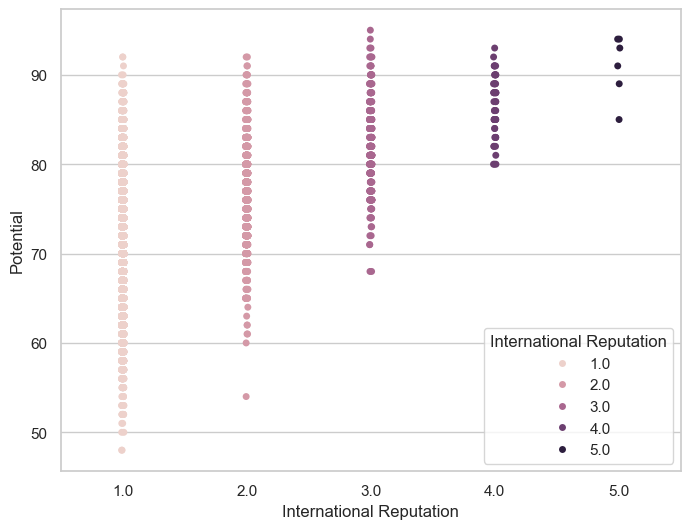

In [123]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa, jitter=0.01,hue="International Reputation")
plt.show()

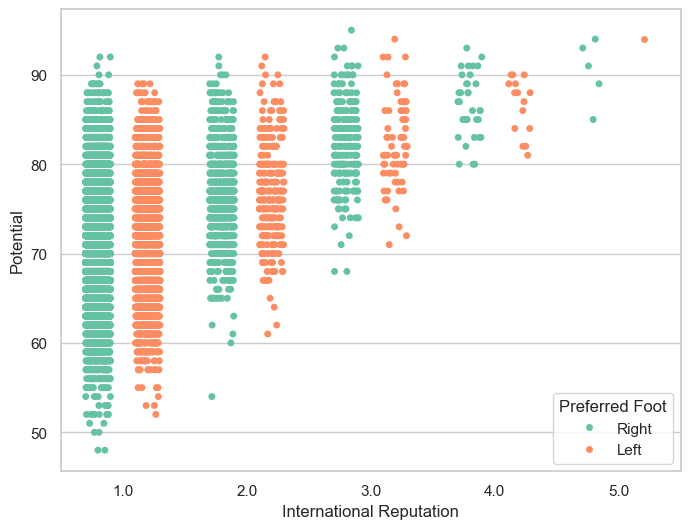

In [129]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa, jitter=0.2, palette="Set2", dodge=True)
plt.show()

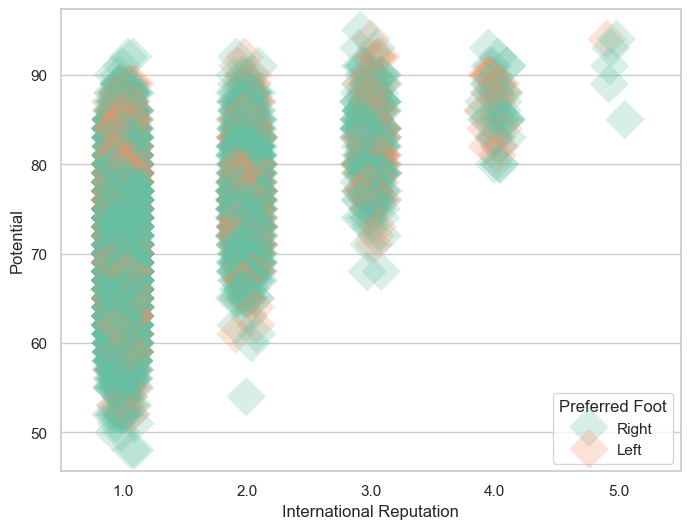

In [141]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()

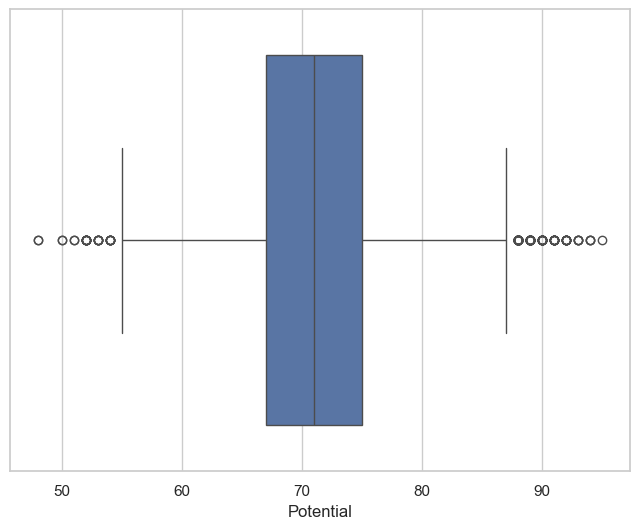

In [143]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa["Potential"])
plt.show()

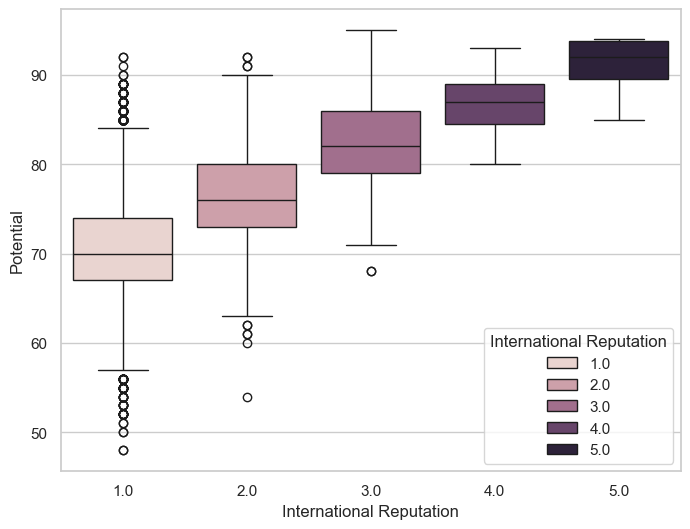

In [151]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa,hue="International Reputation")
plt.show()

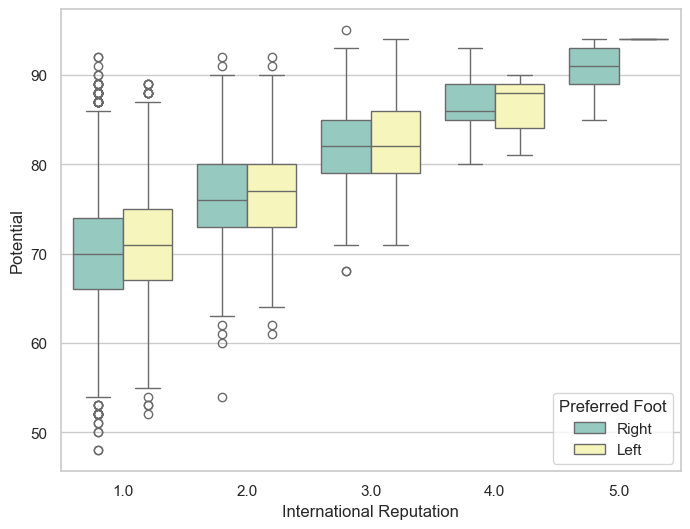

In [147]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa, palette="Set3")
plt.show()

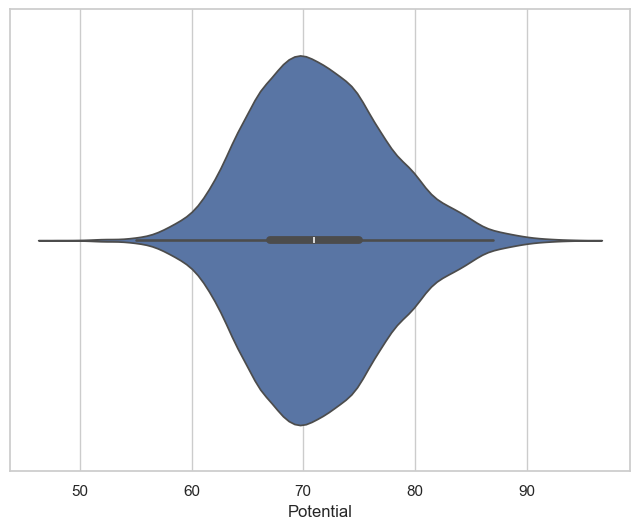

In [153]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa["Potential"])
plt.show()

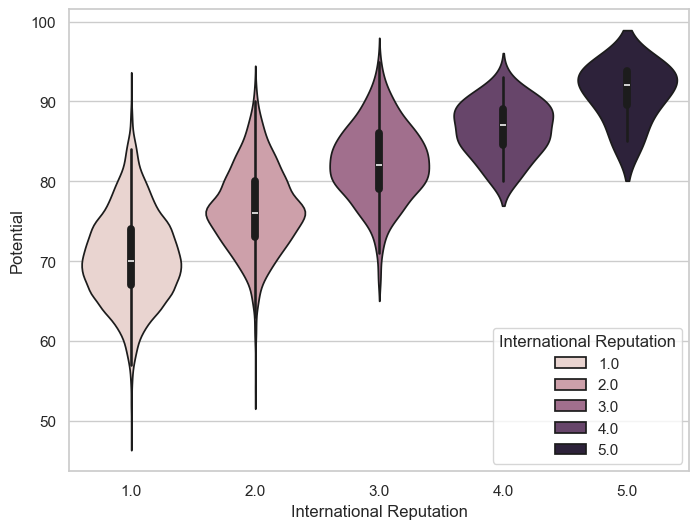

In [157]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa,hue="International Reputation")
plt.show()

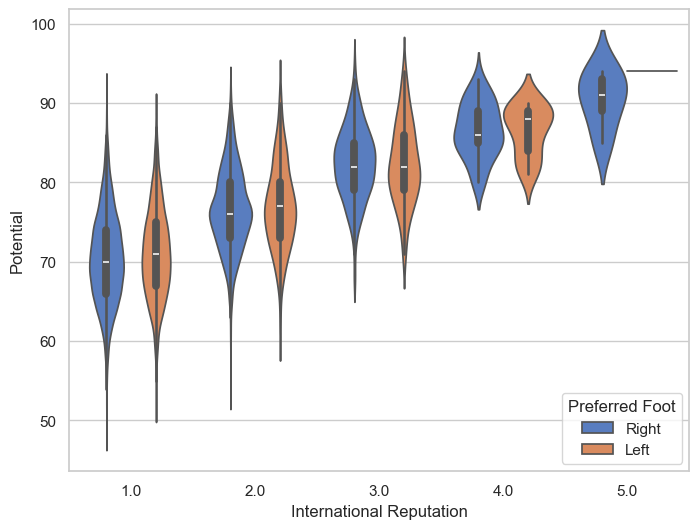

In [159]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa, palette="muted")
plt.show()

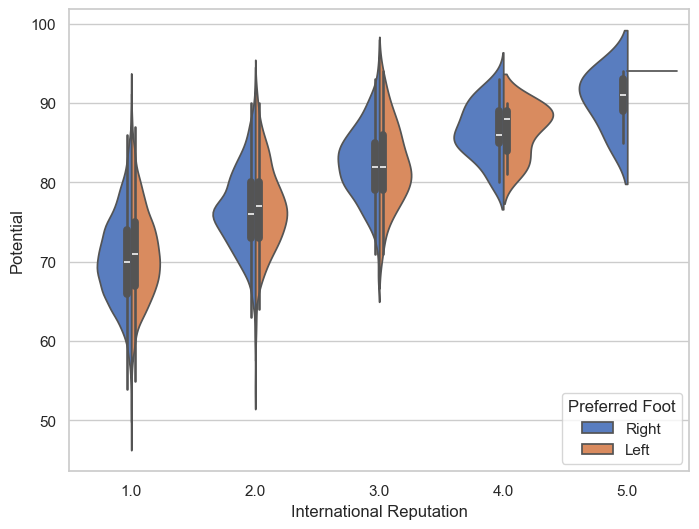

In [161]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa, palette="muted", split=True)
plt.show()

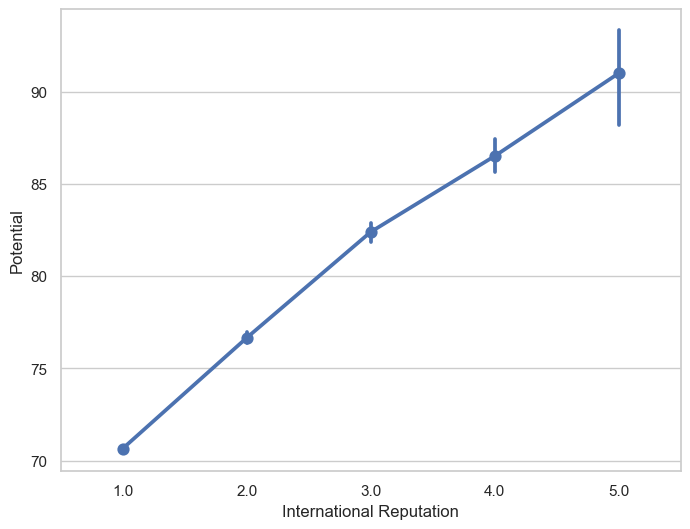

In [165]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

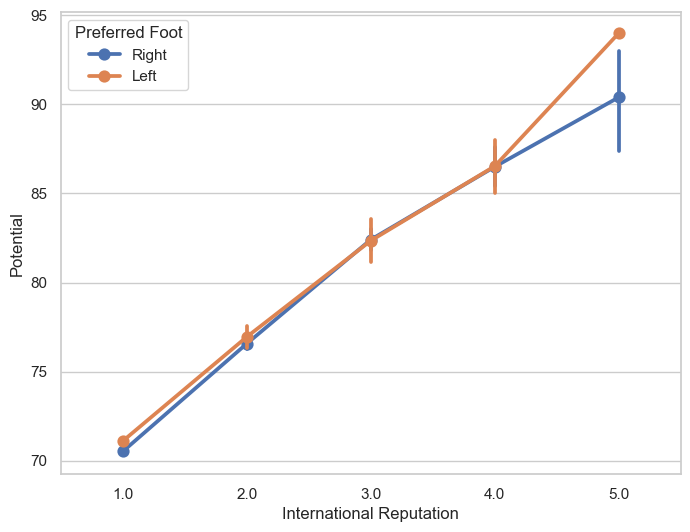

In [167]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa)
plt.show()

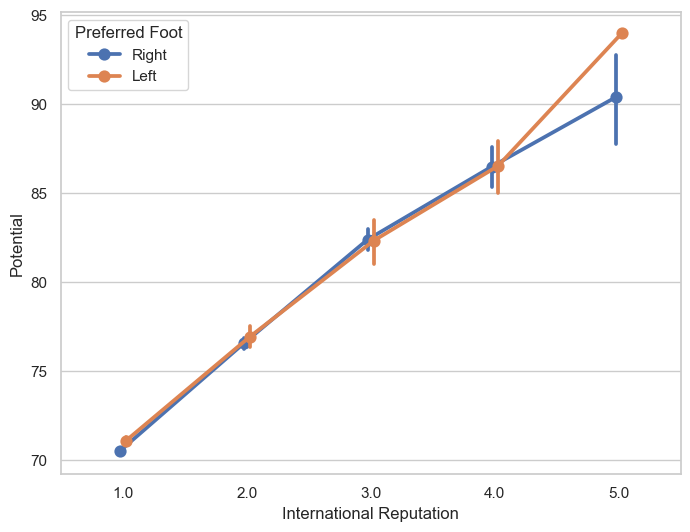

In [169]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa, dodge=True)
plt.show()

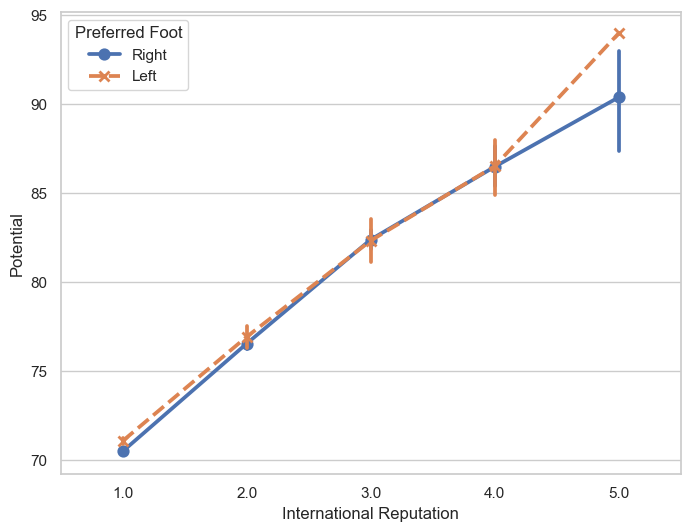

In [171]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

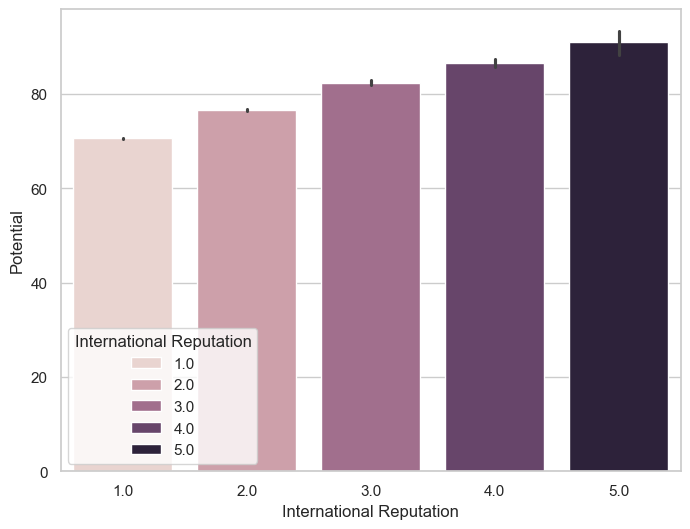

In [175]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa,hue="International Reputation")
plt.show()

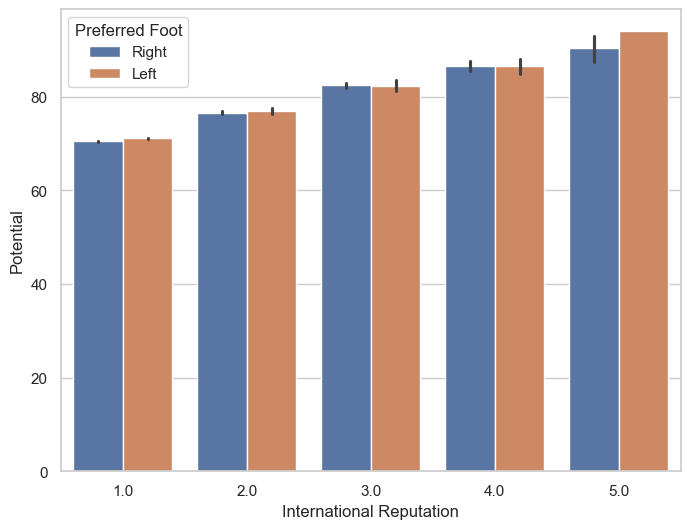

In [177]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa)
plt.show()

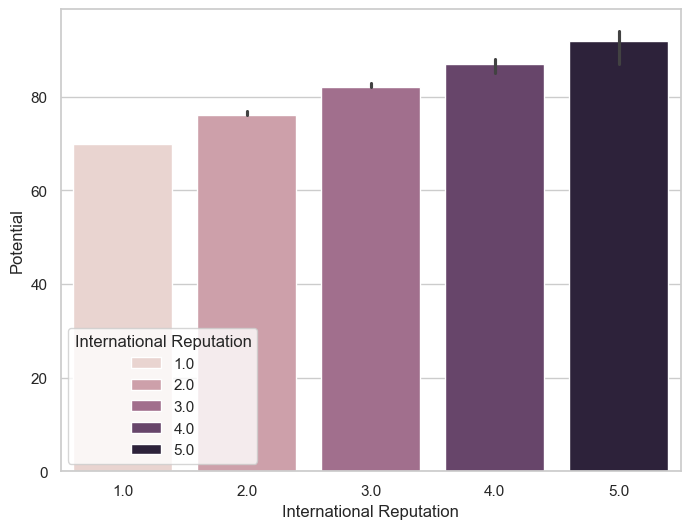

In [181]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, estimator=median,hue="International Reputation")
plt.show()

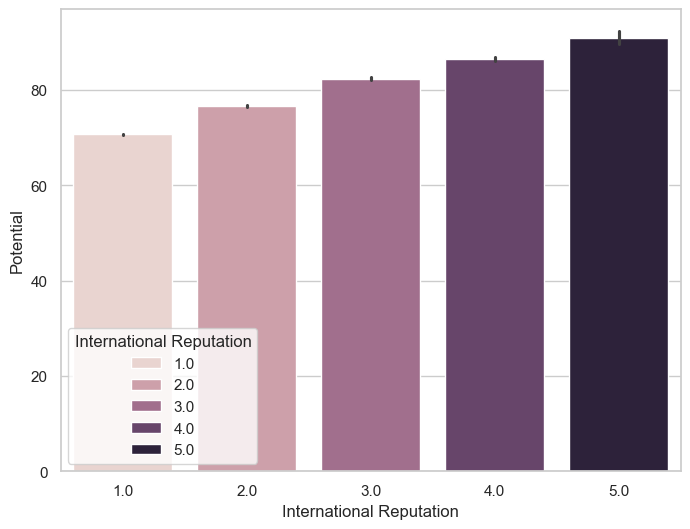

In [189]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, ci=68 ,hue="International Reputation")
plt.show()

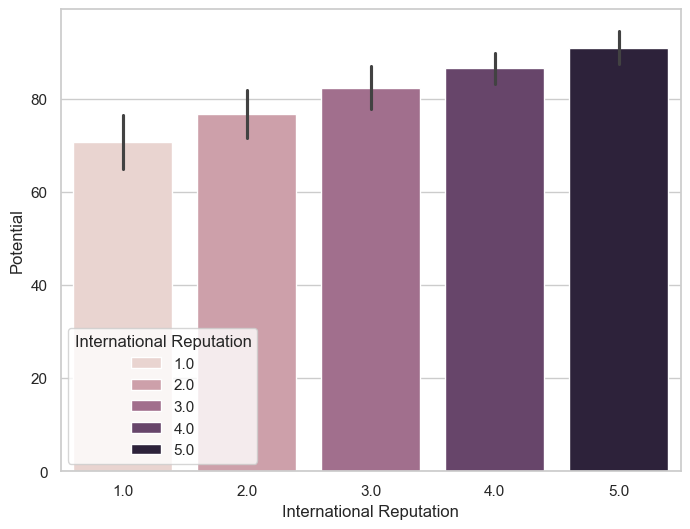

In [187]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, ci="sd",hue="International Reputation")
plt.show()

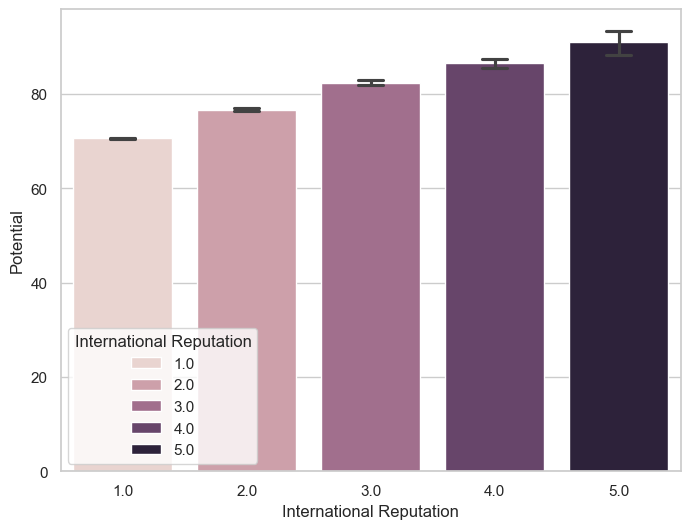

In [191]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="International Reputation",data=fifa, capsize=0.2)
plt.show()

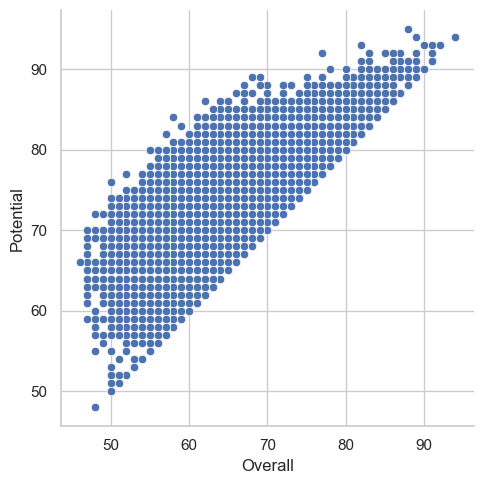

In [197]:
sns.relplot(x="Overall", y="Potential", data=fifa)
plt.show()

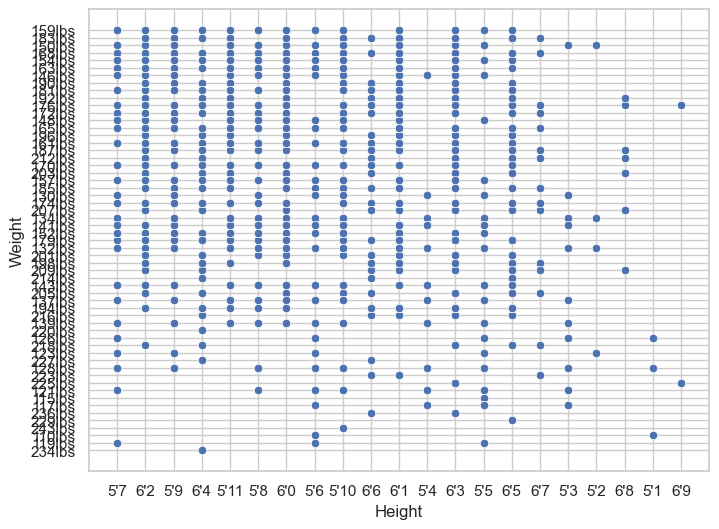

In [199]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", data=fifa)
plt.show()

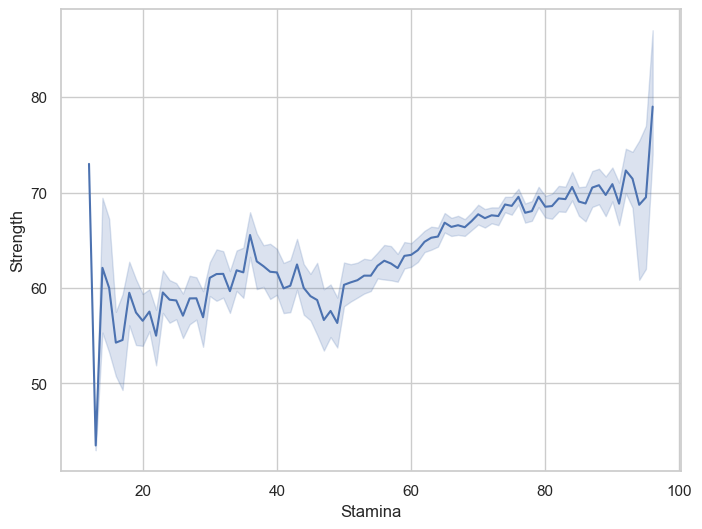

In [201]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa)
plt.show()

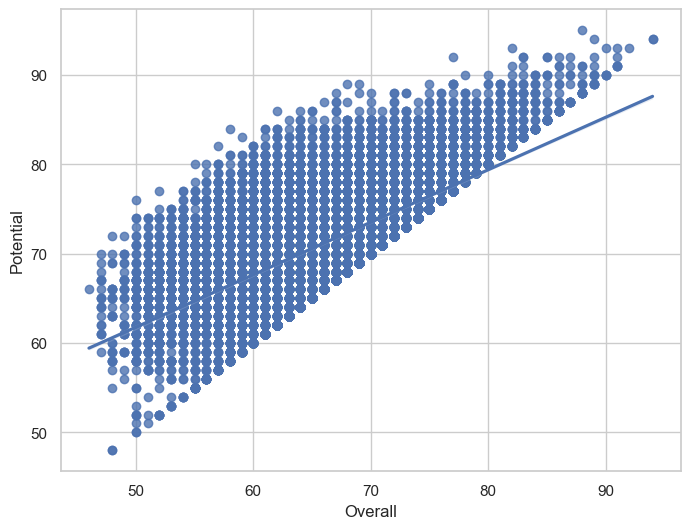

In [203]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa)
plt.show()

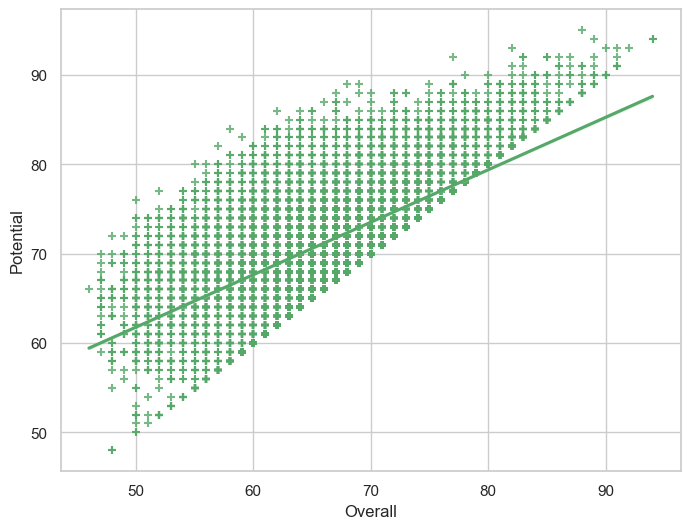

In [205]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa, color= "g", marker="+")
plt.show()

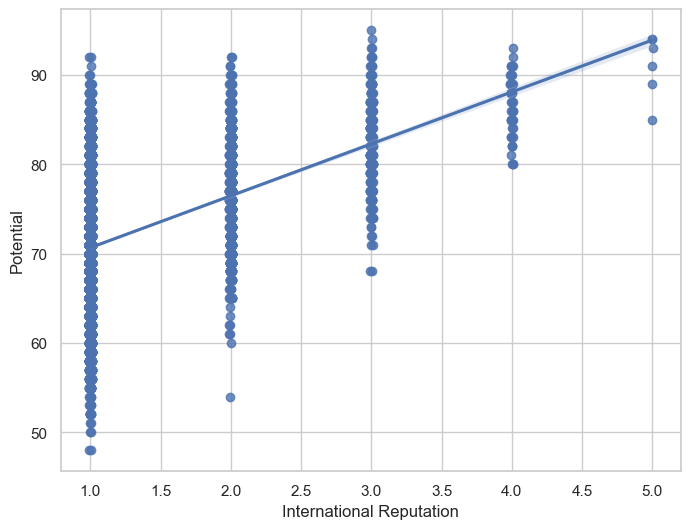

In [207]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa, x_jitter=.01)
plt.show()

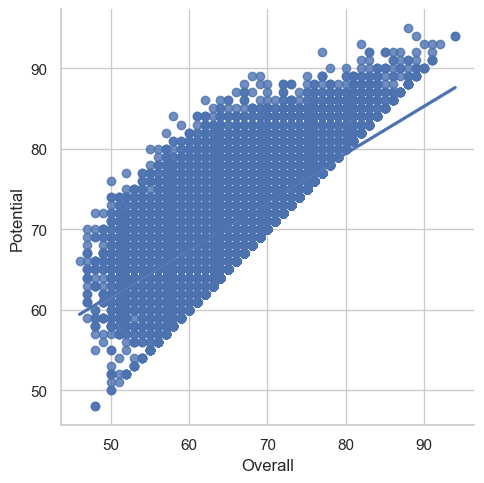

In [213]:
sns.lmplot(x="Overall", y="Potential", data=fifa)
plt.show()

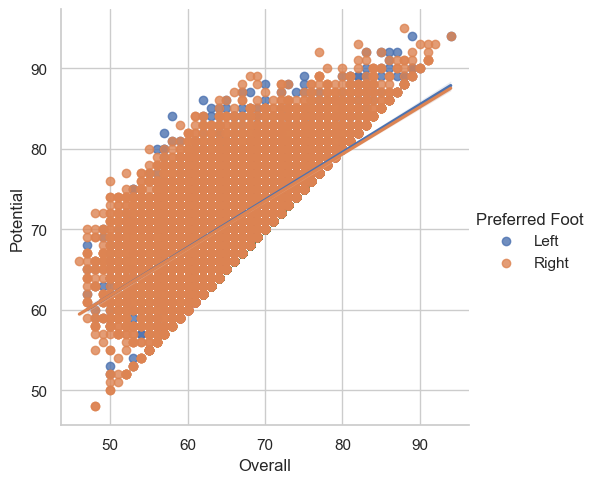

In [219]:
sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa)
plt.show()

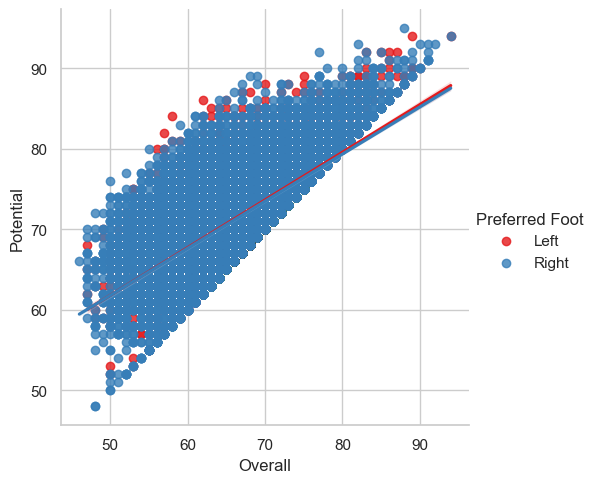

In [221]:
sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa, palette="Set1")
plt.show()

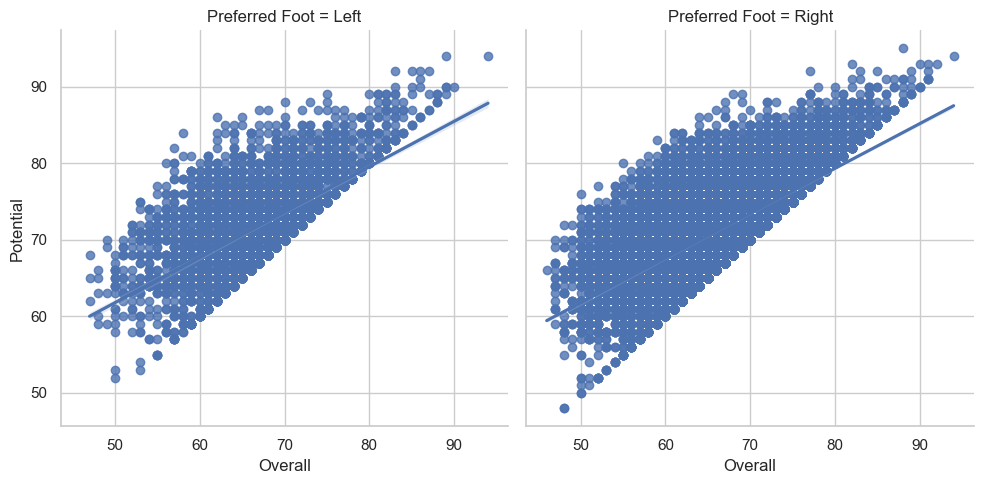

In [223]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa)
plt.show()

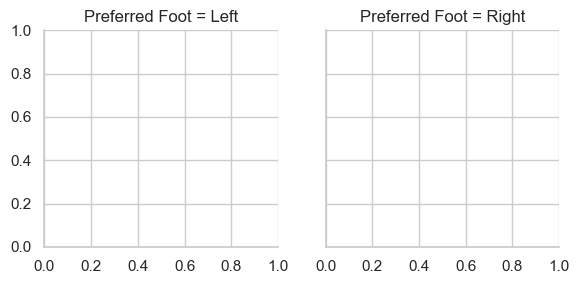

In [225]:
sns.FacetGrid(fifa, col="Preferred Foot")
plt.show()

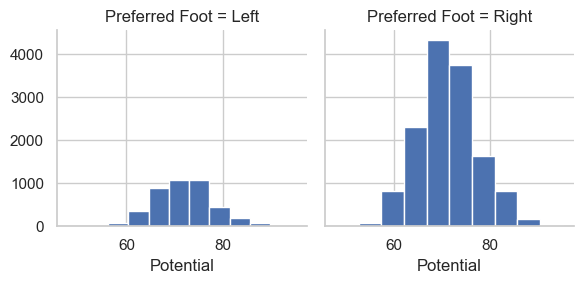

In [233]:
g=sns.FacetGrid(fifa, col="Preferred Foot")
g=g.map(plt.hist, "Potential")
plt.show()

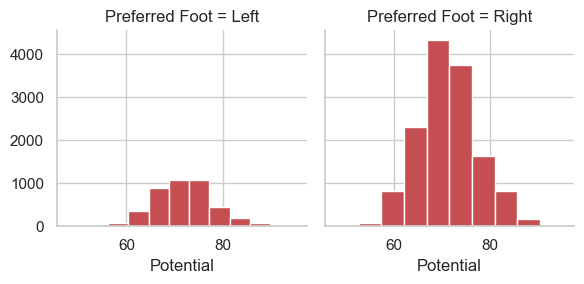

In [239]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")
plt.show()

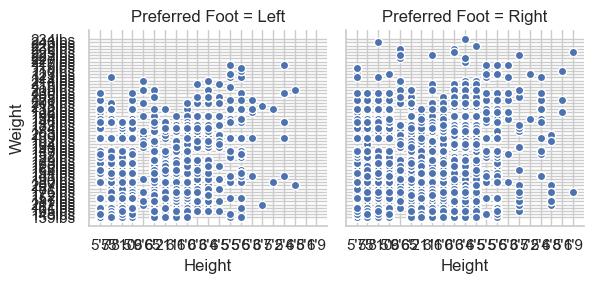

In [241]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())
plt.show()

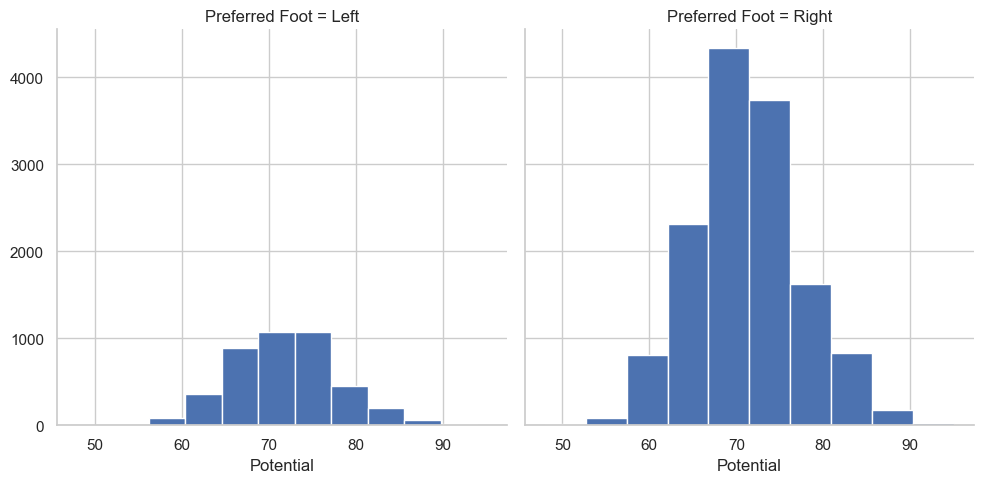

In [243]:
g = sns.FacetGrid(fifa, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")
plt.show()

In [245]:
fifa_new = fifa[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

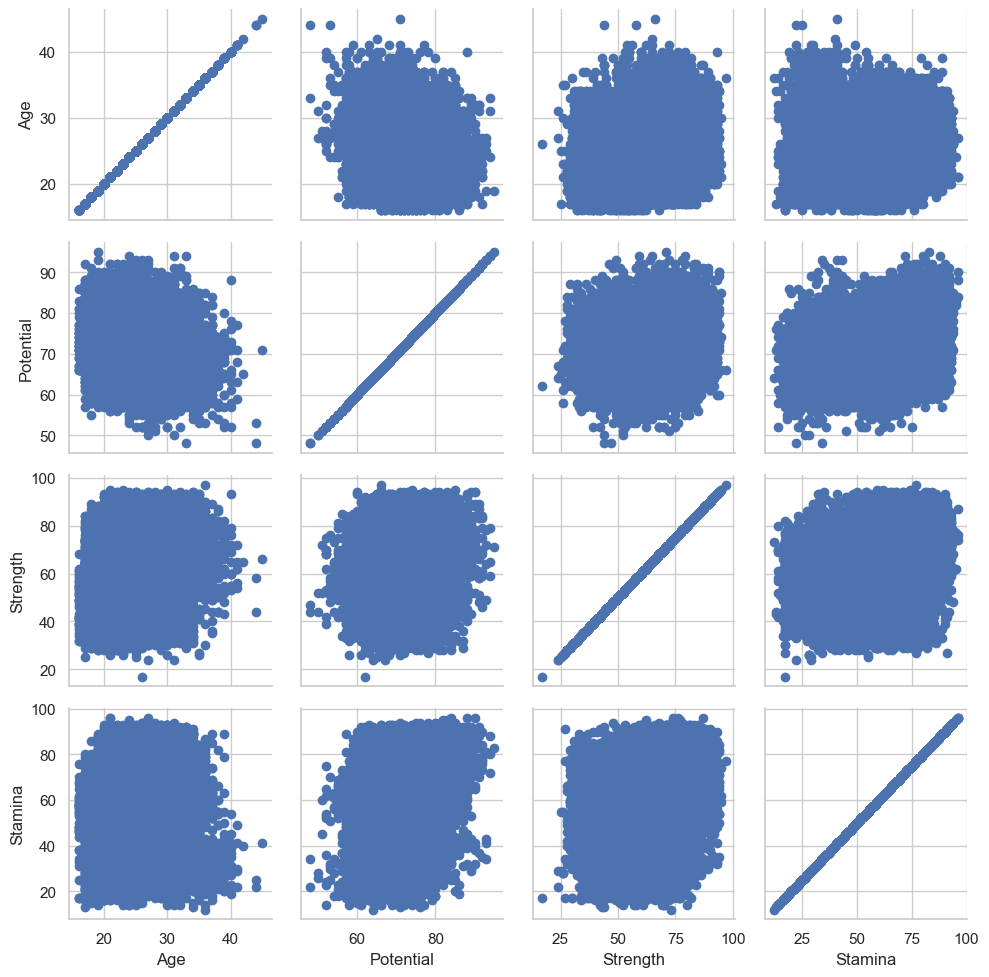

In [250]:
g = sns.PairGrid(fifa_new)
g = g.map(plt.scatter)
plt.show()

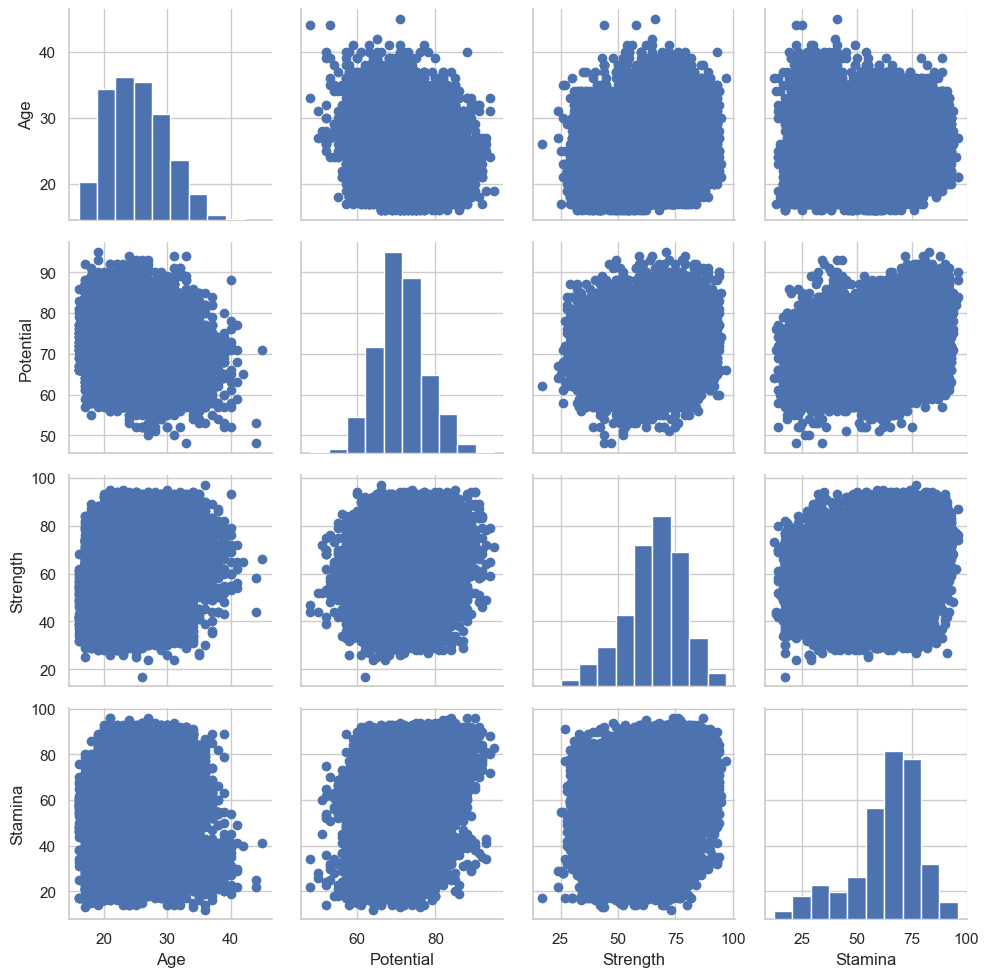

In [255]:
g = sns.PairGrid(fifa_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

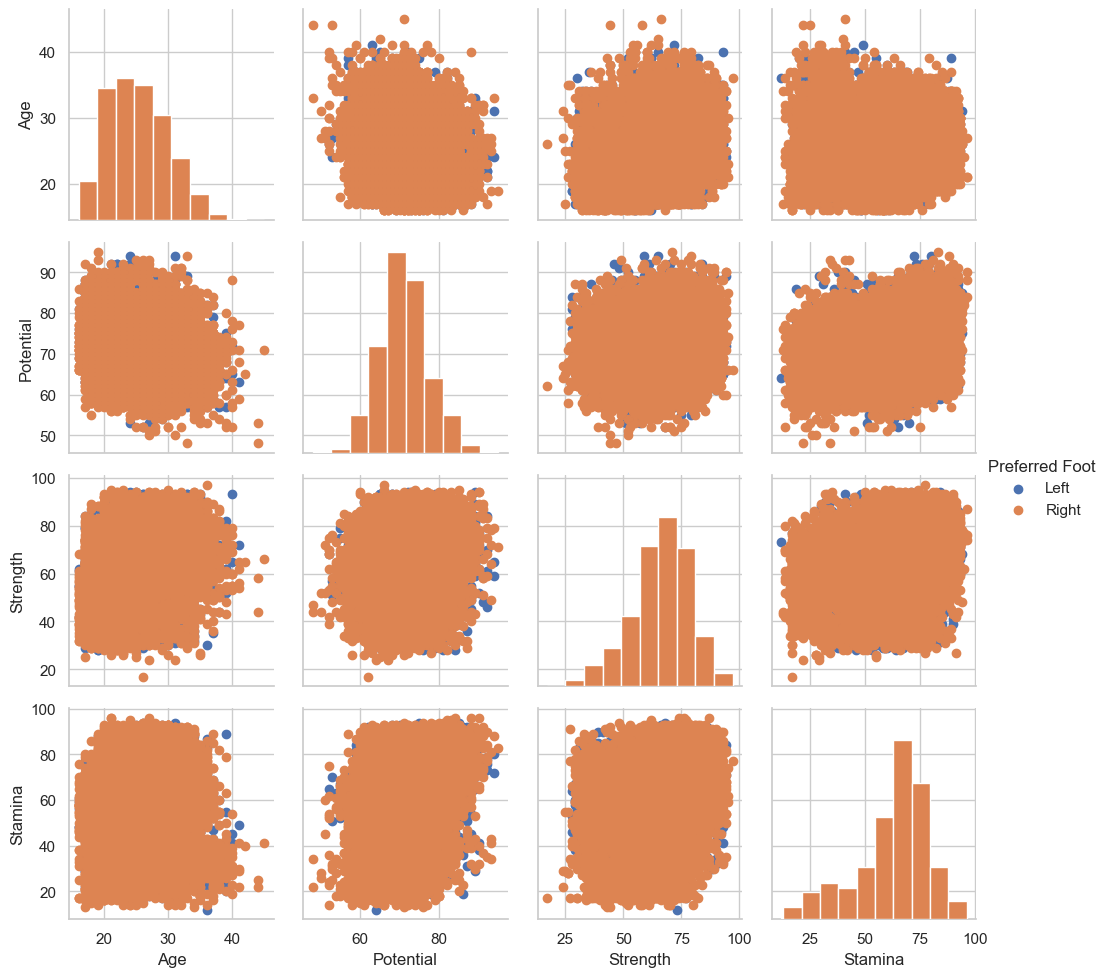

In [257]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

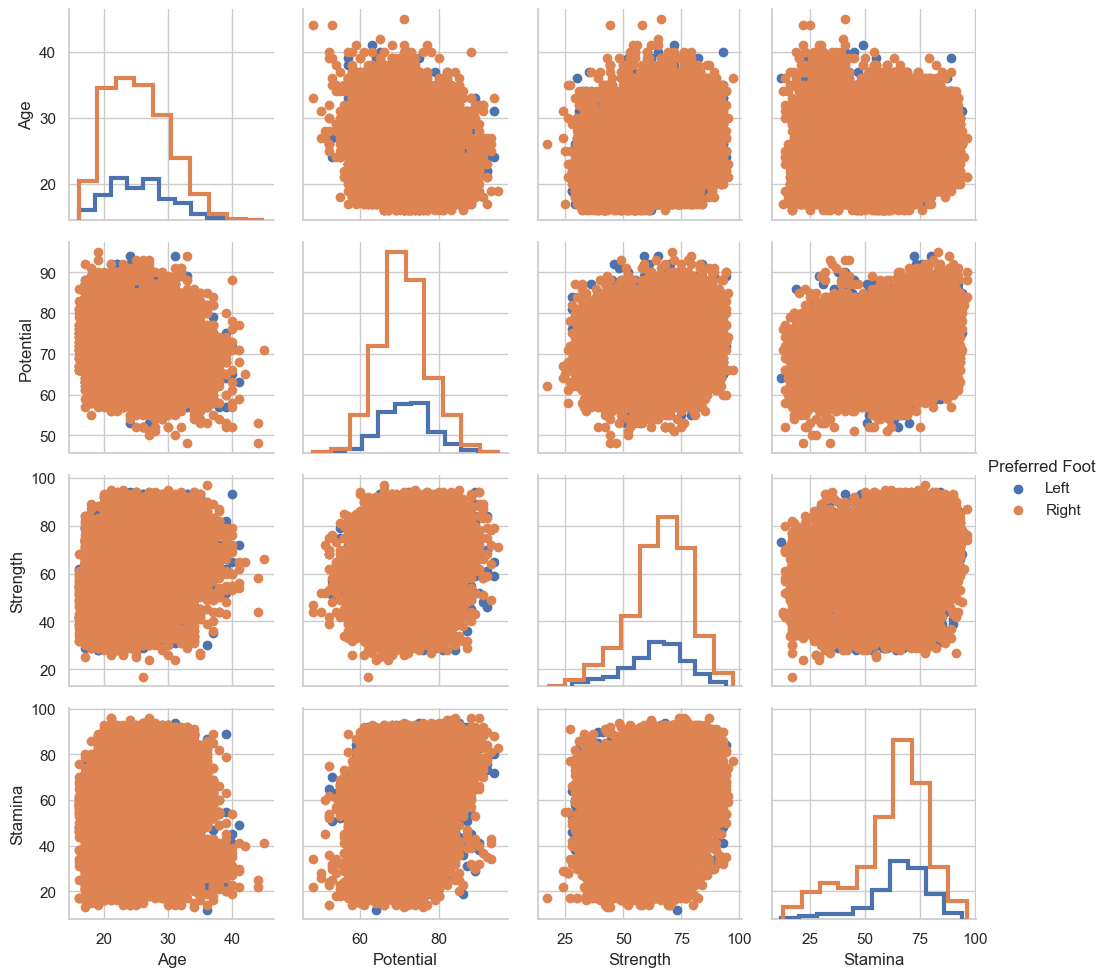

In [259]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

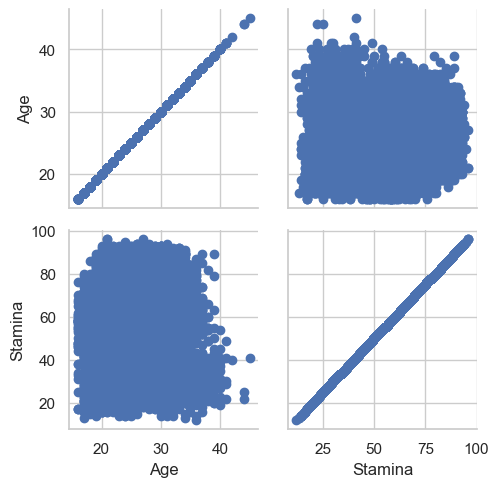

In [261]:
g = sns.PairGrid(fifa_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)
plt.show()

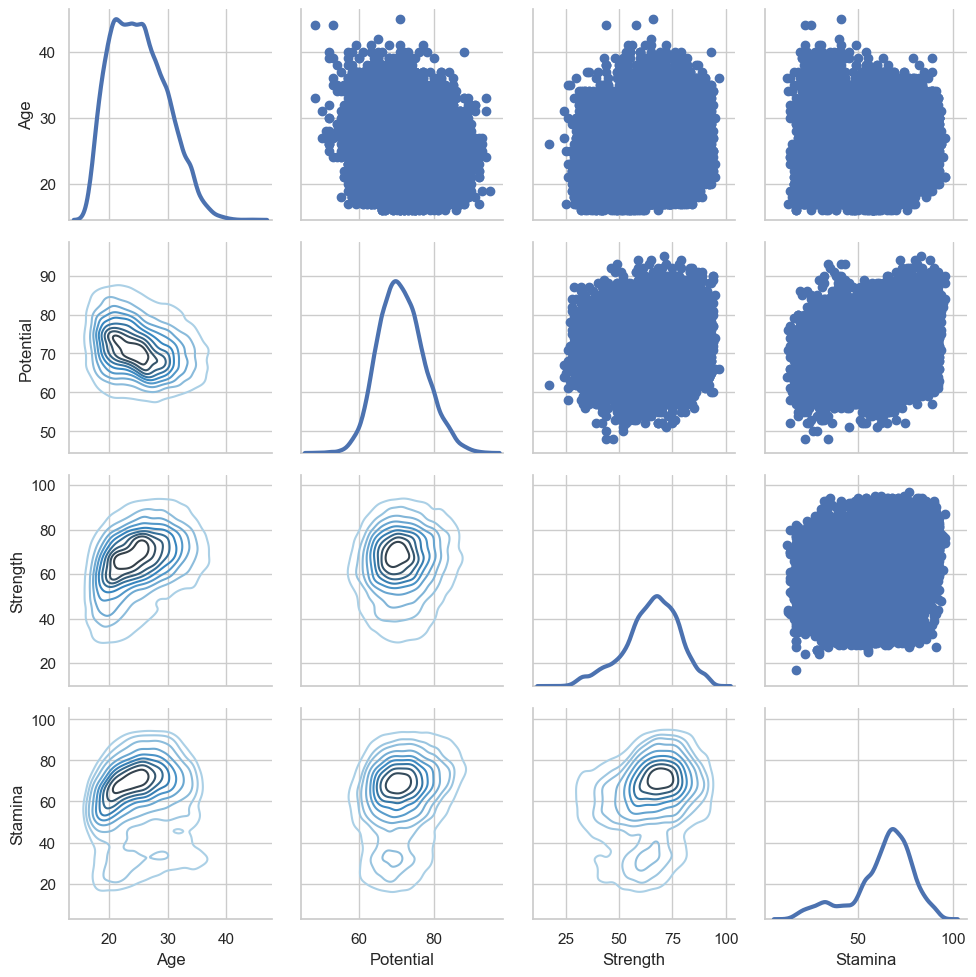

In [263]:
g = sns.PairGrid(fifa_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

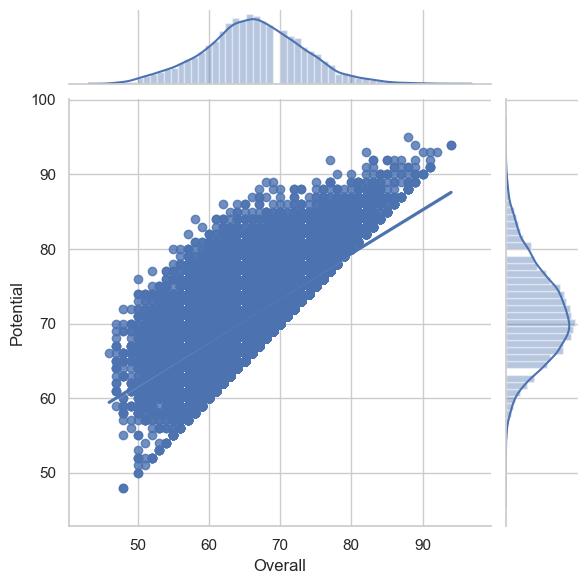

In [265]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

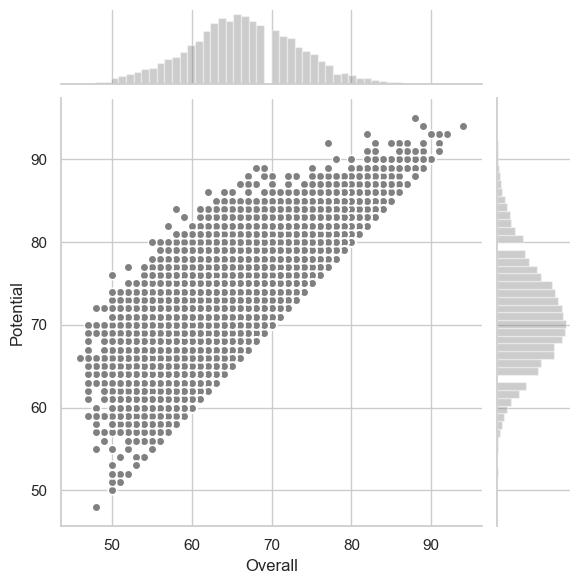

In [267]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")
plt.show()

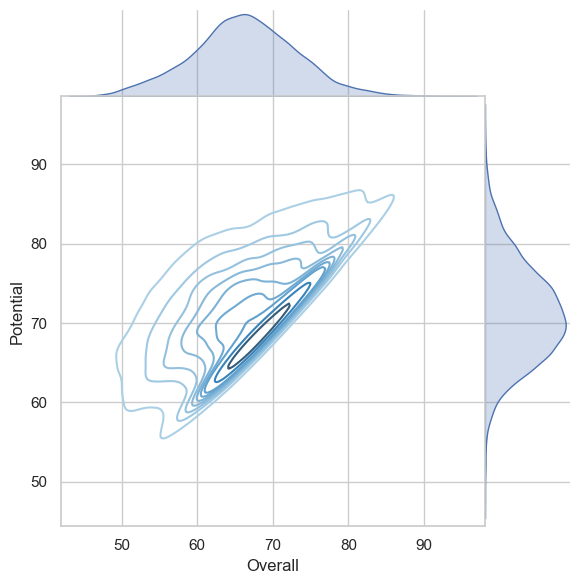

In [269]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

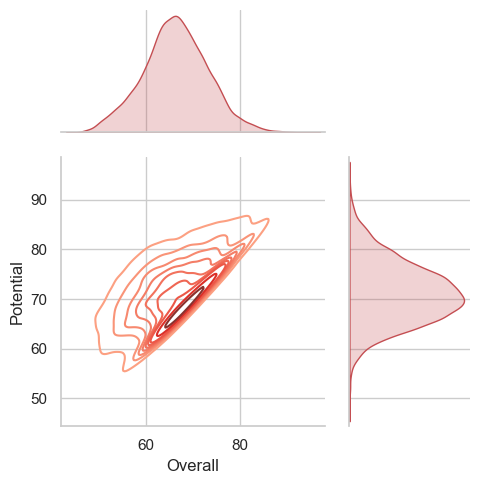

In [271]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)
plt.show()

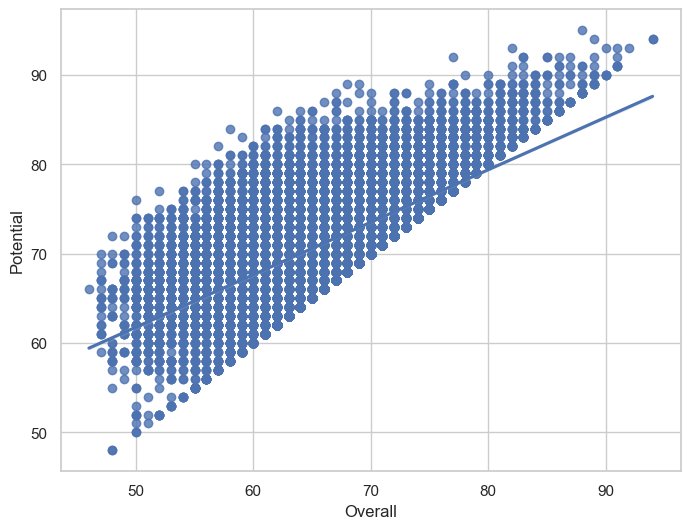

In [273]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa)
plt.show()

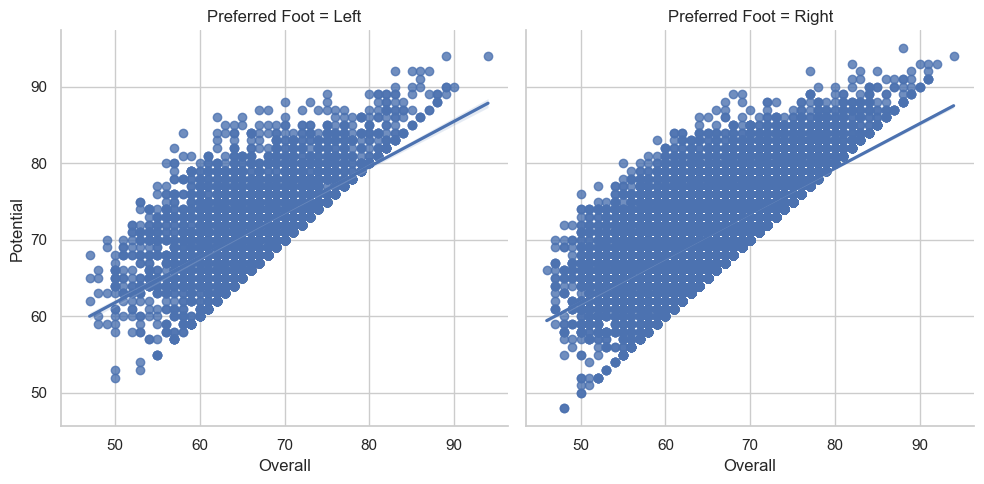

In [275]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa, col_wrap=2, height=5, aspect=1)
plt.show()

In [315]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn style
sns.set_style("ticks")

# Define the seaborn function
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip) 
        
    plt.show() # Show all lines together after plotting


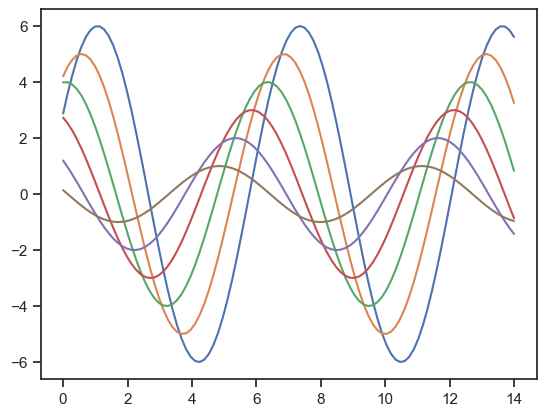

In [317]:
sinplot()

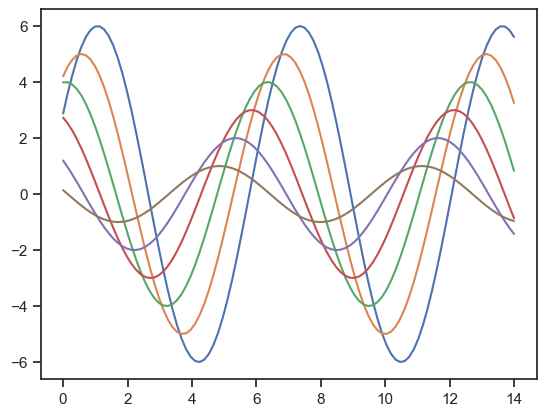

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("ticks")

# Define the seaborn-styled sine plot
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * 0.5) * (7 - i) * flip)
    
    plt.show()  # Show all lines together after plotting

# Call the function
sinplot()


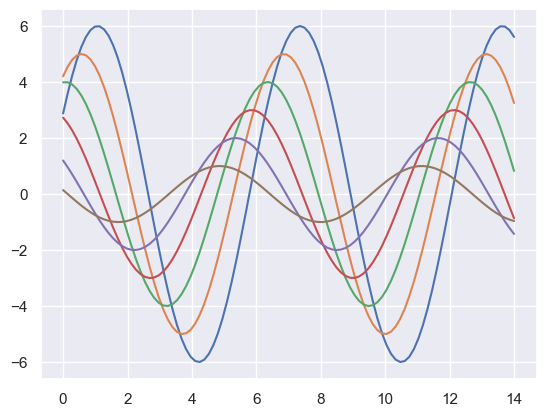

In [319]:
sns.set()
sinplot()

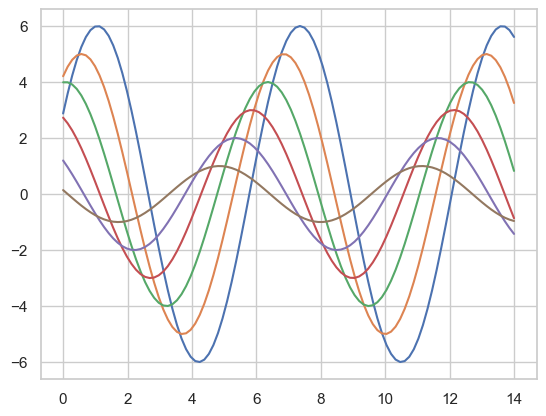

In [321]:
sns.set_style("whitegrid")
sinplot()

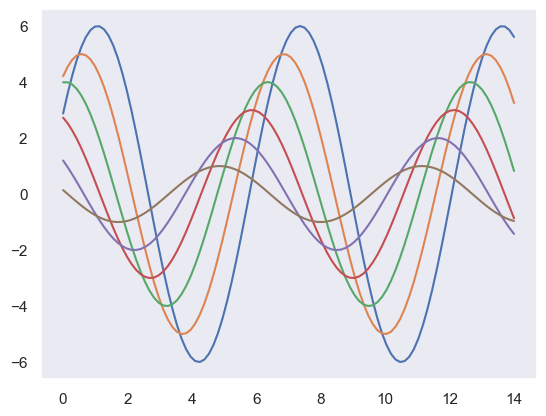

In [323]:
sns.set_style("dark")
sinplot()

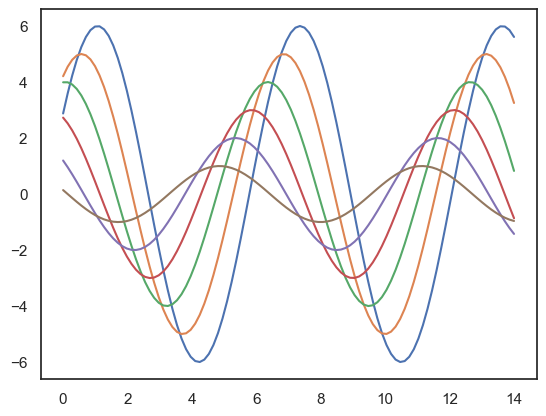

In [325]:
sns.set_style("white")
sinplot()

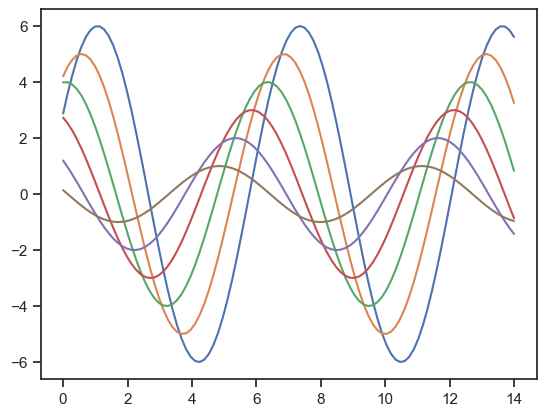

In [327]:
sns.set_style("ticks")
sinplot()